### 导入运行本notebook所需要的package

In [5]:

# Import packages that we need

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2


## 问题2 黑白图像灰度扫描

> **以下三个代码块分别为函数定义、函数调用和结果展示，请依次顺序执行，确保内存中保存有后续需要的函数或者数据。**

In [6]:
def scanLine4e(f, I, loc):

    """
    Extracts pixel values along a specific row or column from a grayscale image.
    
    Parameters:
        f (numpy.ndarray): Grayscale image.
        I (int): Index of the row or column to be extracted.
        loc (str): Either "row" or "column".
        
    Returns:
        numpy.ndarray: Pixel values along the specified row or column.
    """
    
    # Check if the image is grayscale
    if len(f.shape) > 2:
        raise ValueError("The input image should be grayscale.")
    
    if loc == 'row':
        # return [ f[I][j] for j in range(f.shape[1])]
        return  f[I ,: ]
    elif loc == 'column':
        # return [ f[i][I] for i in range(f.shape[0])]
        return f[ : ,I ]
    else:
        raise ValueError("Invalid location specified. Choose 'row' or 'column'.")



In [7]:

# Load the images using PIL
cameraman_img_pil = Image.open("cameraman.tif")
einstein_img_pil = Image.open("einstein.tif")

# Convert PIL images to numpy arrays
cameraman_np = np.array(cameraman_img_pil)
einstein_np = np.array(einstein_img_pil)

# Extract the center row and column for both images using our previously defined function
cameraman_center_row_pil = scanLine4e(cameraman_np, cameraman_np.shape[0] // 2, 'row')
cameraman_center_column_pil = scanLine4e(cameraman_np, cameraman_np.shape[1] // 2, 'column')

einstein_center_row_pil = scanLine4e(einstein_np, einstein_np.shape[0] // 2, 'row')
einstein_center_column_pil = scanLine4e(einstein_np, einstein_np.shape[1] // 2, 'column')

# Plotting the grayscale sequences



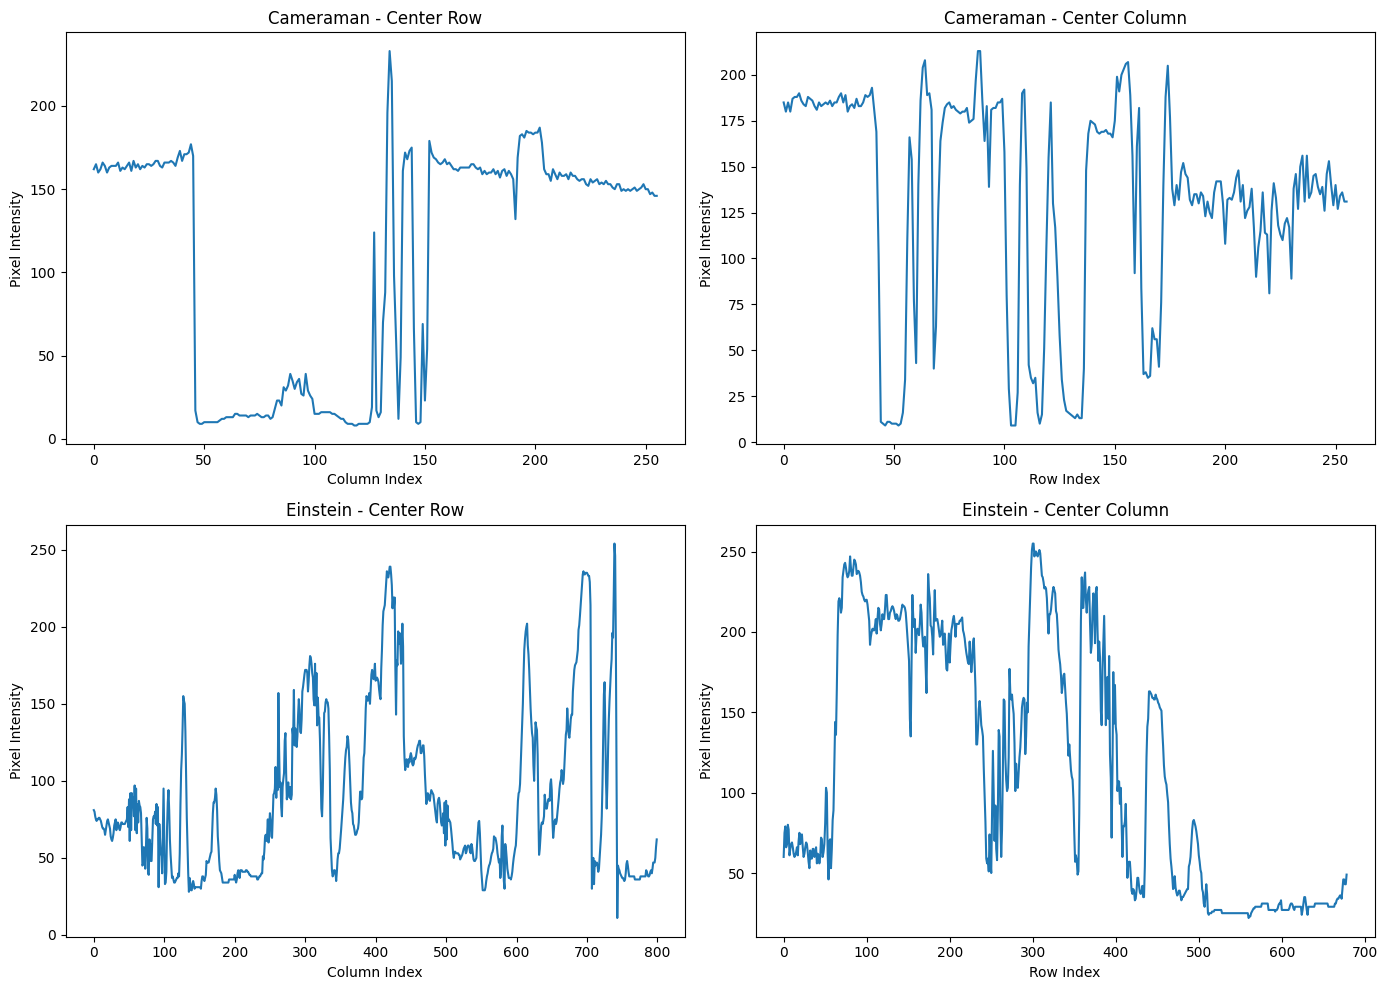

In [8]:
# Plotting the grayscale value

# 创建一个新的画布和 2x2 的子图网格
# fig 是画布对象，axes 是一个包含所有子图的数组
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 将 2D 子图数组转换为 1D 数组，使其更容易迭代
axes = axes.ravel()

# 在左上角的子图中绘制cameraman.tif的中心行的像素灰度值
axes[0].plot(cameraman_center_row_pil)
axes[0].set_title("Cameraman - Center Row")
axes[0].set_xlabel("Column Index")
axes[0].set_ylabel("Pixel Intensity")

# 在右上角的子图中绘制cameraman.tif的中心列的像素灰度值
axes[1].plot(cameraman_center_column_pil)
axes[1].set_title("Cameraman - Center Column")
axes[1].set_xlabel("Row Index")
axes[1].set_ylabel("Pixel Intensity")

# 在左下角的子图中绘制einstein.tif的中心行的像素灰度值
axes[2].plot(einstein_center_row_pil)
axes[2].set_title("Einstein - Center Row")
axes[2].set_xlabel("Column Index")
axes[2].set_ylabel("Pixel Intensity")

# 在右下角的子图中绘制einstein.tif的中心列的像素灰度值
axes[3].plot(einstein_center_column_pil)
axes[3].set_title("Einstein - Center Column")
axes[3].set_xlabel("Row Index")
axes[3].set_ylabel("Pixel Intensity")

# 调整子图的布局，以避免重叠
plt.tight_layout()

# 显示图形
plt.show()

# 保存图像到本地文件夹
fig.savefig("center_rows_columns_plot.png")

##  问题3 彩色图像转换为黑白图像

> 以下三个代码块分别为定义函数、函数调用和调用结果绘制，请依次执行代码块，快捷键为  "shift enter"。


In [16]:

def rgb1gray(f, method="NTSC"):
    """
    Converts an RGB image to grayscale.
    
    Parameters:
        f (numpy.ndarray): RGB image with shape (M, N, 3).
        method (str): Conversion method ('average' or 'NTSC'). Default is 'NTSC'.
        
    Returns:
        numpy.ndarray: Grayscale image with shape (M, N).
    """

    
    width, height = f.size
    pixels = f.load()  # Load pixel data
    g = Image.new("L", (width, height))  # Create a grayscale image
    
    for i in range(width):
        for j in range(height):
            # Iterate every  pixel and calculate the proper pixel value
            r, green, b = pixels[i, j]
            if method == "average":
                gray = (r + green + b) // 3
            elif method == "NTSC":
                gray = int(0.2989 * r + 0.5870 * green + 0.1140 * b)
            else:
                raise ValueError("Invalid method specified. Choose 'average' or 'NTSC'.")
            g.putpixel((i, j), gray)
    
    return g



In [17]:

# Load the images again using PIL
mandril_img = Image.open("mandril_color.tif")
lena_img = Image.open("lena512color.tiff")

# Convert the images to grayscale using both methods
mandril_gray_average = rgb1gray(mandril_img, "average")
mandril_gray_ntsc = rgb1gray(mandril_img, "NTSC")

lena_gray_average = rgb1gray(lena_img, "average")
lena_gray_ntsc = rgb1gray(lena_img, "NTSC")


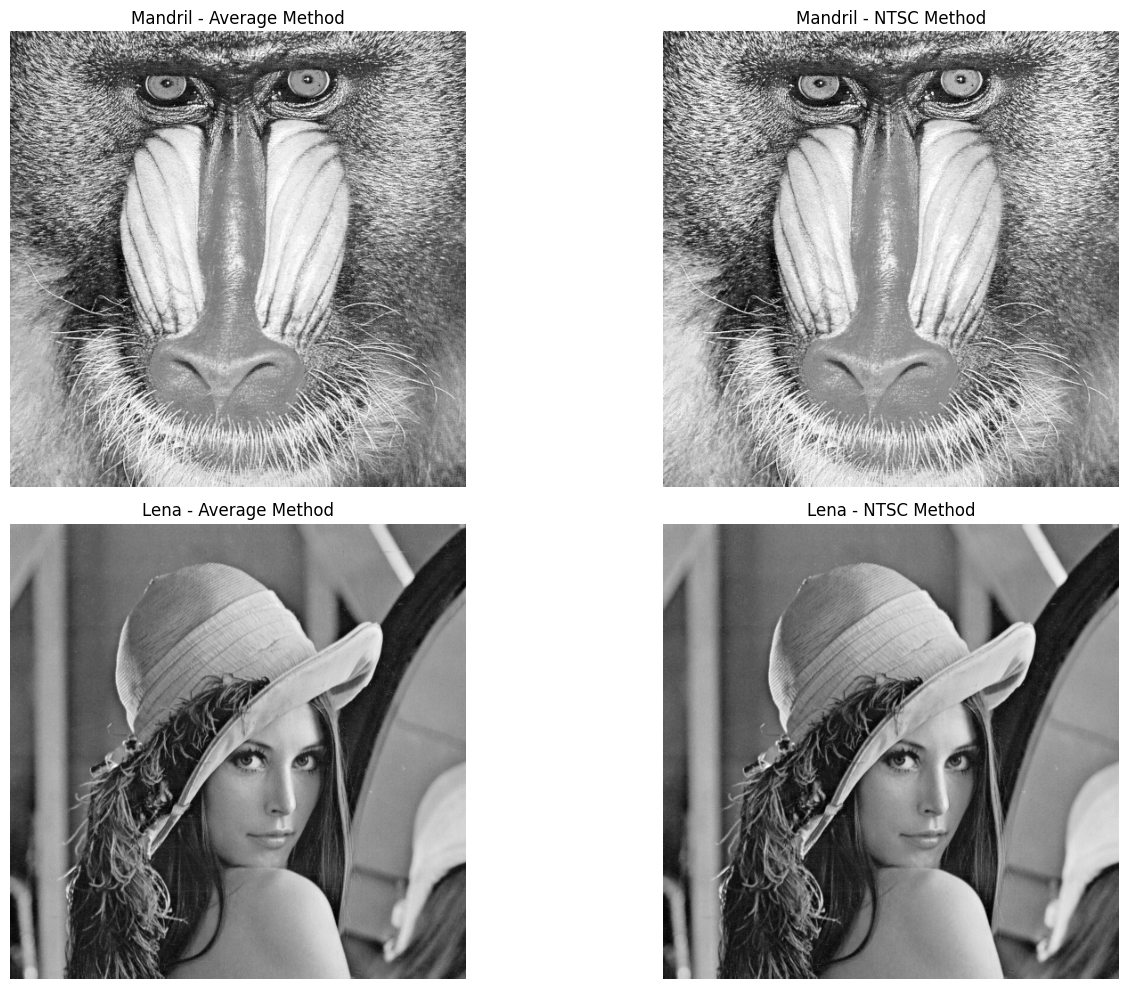

In [18]:
# 创建一个新的图像窗口，并设置其大小为15x10单位
plt.figure(figsize=(15, 10))

# 在左上角绘制Mandril图像，使用Average Method
# 使用2x2的子图布局中的第一个位置
plt.subplot(2, 2, 1)
# 显示图像，使用灰度颜色映射
plt.imshow(mandril_gray_average, cmap='gray')
# 为图像设置标题
plt.title("Mandril - Average Method")
# 关闭坐标轴，使图像看起来更整洁
plt.axis('off')

# 在右上角绘制Mandril图像，使用NTSC Method
# 使用2x2的子图布局中的第二个位置
plt.subplot(2, 2, 2)
plt.imshow(mandril_gray_ntsc, cmap='gray')
plt.title("Mandril - NTSC Method")
plt.axis('off')

# 在左下角绘制Lena图像，使用Average Method
# 使用2x2的子图布局中的第三个位置
plt.subplot(2, 2, 3)
plt.imshow(lena_gray_average, cmap='gray')
plt.title("Lena - Average Method")
plt.axis('off')

# 在右下角绘制Lena图像，使用NTSC Method
# 使用2x2的子图布局中的第四个位置
plt.subplot(2, 2, 4)
plt.imshow(lena_gray_ntsc, cmap='gray')
plt.title("Lena - NTSC Method")
plt.axis('off')

# 自动调整子图布局，使其不重叠并填充整个图像窗口
plt.tight_layout()

# 保存整个图像窗口为PNG文件
plt.savefig("Average_NTSC_Employed_plot.png")


# 显示所有子图
plt.show()

## 问题 4 图像二维卷积函数 (20 分)

In [19]:
def twodConv(f, w, padding_method='zero'):
    """Apply 2D convolution to an image with a given kernel.
    
    Parameters:
    - f: Grayscale source image.
    - w: Convolution kernel (2D matrix).
    - padding_method: Method for padding ('replicate' or 'zero'). Default is 'zero'.
    
    Returns:
    - g: Convolved image of the same size as f.
    """
    
    # Dimensions of the image and the kernel
    img_width, img_height = f.size
    kernel_width, kernel_height = w.shape
    
    # Determine the padding size
    # Minus 1 ensures that pad_width or pad_height less than half of kernel_width and height
    pad_width = (kernel_width - 1) // 2
    pad_height = (kernel_height -1) // 2
    
    # Create a new image with padding
    if padding_method == 'replicate':
        padded_img = Image.new("L", (img_width + 2*pad_width, img_height + 2*pad_height))
        for x in range(img_width + 2*pad_width):
            for y in range(img_height + 2*pad_height):
                orig_x = min(max(x - pad_width, 0), img_width - 1)
                orig_y = min(max(y - pad_height, 0), img_height - 1)
                padded_img.putpixel((x, y), f.getpixel((orig_x, orig_y)))
    elif padding_method == 'zero':
        padded_img = Image.new("L", (img_width + 2*pad_width, img_height + 2*pad_height), color=0)
        for x in range(img_width):
            for y in range(img_height):
                padded_img.putpixel((x + pad_width, y + pad_height), f.getpixel((x, y)))
    else:
        raise ValueError("Invalid padding method. Choose 'replicate' or 'zero'.")
    
    # Rotate the kernel by 180 degrees to perform  convolution operation
    w = np.rot90(w, 2)

    # Apply 2D convolution 
    g = Image.new("L", (img_width, img_height))
    for x in range(img_width):
        for y in range(img_height):
            # Convolve the kernel with the corresponding part of the padded image
            value = sum([padded_img.getpixel((x + i, y + j)) * w[i, j] 
                         for i in range(kernel_width) 
                         for j in range(kernel_height)])
            g.putpixel((x, y), int(value))
    
    return g


## 问题 5 归一化二维高斯滤波核函数 (20 分)

In [20]:
def gaussKernel(sig, m=None):
    """
    Generate a Gaussian kernel.
    
    Parameters:
    - sig: Standard deviation (σ) for the Gaussian function.
    - m: Size of the kernel (m x m). If not provided, it's calculated based on sigma.
    
    Returns:
    - w: m x m Gaussian kernel.
    """
    
    # If m is not provided, calculate it based on sigma.
    if m is None:
        m = int(6 * sig + 1)
    
    # Ensure m is odd for symmetry
    if m % 2 == 0:
        m += 1
    
    # If provided m is too small, raise a warning.
    if m < 3:
        print("Warning: The provided m value is too small. It's recommended to use a larger size.")
    
    # Create the Gaussian kernel
    w = np.zeros((m, m))
    
    center = m // 2
    for i in range(m):
        for j in range(m):
            x = i - center
            y = j - center
            w[i, j] =  (1/(2* math.pi*sig**2)) * np.exp(-(x**2 + y**2) / (2 * sig**2))
    
    # Normalize the kernel
    w /= w.sum()
    
    return w



## 问题 6 灰度图像的高斯滤波 (20 分)

In [22]:
# Load the grayscale images
cameraman_img = Image.open("cameraman.tif")
einstein_img = Image.open("einstein.tif")

lena_gray_ntsc = rgb1gray(Image.open("lena512color.tiff"), method="NTSC")
mandril_gray_ntsc = rgb1gray(Image.open("mandril_color.tif"), method="NTSC")

# List of images and sigma values
images = [cameraman_img, einstein_img, lena_gray_ntsc, mandril_gray_ntsc]
sigmas = [1, 2, 3, 5]

# Apply Gaussian filtering
filtered_images = {}

# Dictionary to store difference images for sigma=1
diff_images = {
    "cameraman": None,
    "einstein": None,
    "lena512color": None,
    "mandril_color": None
}


for img, name in zip(images, ["cameraman", "einstein", "lena_ntsc", "mandril_ntsc"]):
    for sigma in sigmas:
        kernel = gaussKernel(sigma)
        filtered = twodConv(img, kernel, padding_method='replicate')
        filtered_images[f"{name}_sigma_{sigma}"] = filtered
        # This has to be executed after the above kernel defined
        if sigma == 1:
            filtered_cv = cv2.GaussianBlur(np.array(img), (kernel.shape[0], kernel.shape[1]), sigma)
            diff = filtered - filtered_cv
            diff_images[name] = diff



In [ ]:
# Modify the plotting code to include the original images on the leftmost side
fig, axs = plt.subplots(len(images), len(sigmas) + 2, figsize=(18, 10))  # +2 to account for the original image and diff image

for i, (img, name) in enumerate(zip(images, ["cameraman", "einstein", "lena_ntsc", "mandril_ntsc"])):
    # Display the original image
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f"{name} (Original)")
    axs[i, 0].axis('off')
    
    # Display the filtered images
    for j, sigma in enumerate(sigmas):
        axs[i, j+1].imshow(filtered_images[f"{name}_sigma_{sigma}"], cmap='gray')  # +1 to shift for original image
        axs[i, j+1].set_title(f"{name} (σ={sigma})")
        axs[i, j+1].axis('off')
    
    # Display the difference image for sigma=1
    axs[i, len(sigmas)+1].imshow(diff_images[name], cmap='gray', vmin=-255, vmax=255)  # +1 to shift for original image
    axs[i, len(sigmas)+1].set_title(f"{name} (Diff σ=1)")
    axs[i, len(sigmas)+1].axis('off')

plt.tight_layout()
plt.savefig("Gaussian_Filter_Applied_With_Difference_Displayed.png")
plt.show()


In [ ]:
# Apply Gaussian filtering with both padding methods and compare the difference at the borders
selected_images = [cameraman_img, einstein_img]
selected_names = ["cameraman", "einstein"]
sigma = 1  # We will use sigma=1 for this comparison
border_diff_images = {}

for img, name in zip(selected_images, selected_names):
    kernel = gaussKernel(sigma)
    
    # Using replicate padding
    filtered_replicate = twodConv(img, kernel, padding_method='replicate')
    
    # Using zero padding
    filtered_zero = twodConv(img, kernel, padding_method='zero')
    
    # Calculate the difference at the borders
    border_diff = filtered_replicate - filtered_zero
    border_diff_images[name] = border_diff


In [ ]:
# Modify the plotting code to include the original images alongside the border differences
fig, axs = plt.subplots(2, len(selected_images), figsize=(10, 10))  # 2 rows for original and difference images

# Display the original images
for i, (img, name) in enumerate(zip(selected_images, selected_names)):
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_title(f"{name} (Original)")
    axs[0, i].axis('off')

# Display the difference at the borders for the selected images
for i, name in enumerate(selected_names):
    axs[1, i].imshow(border_diff_images[name], cmap='gray', vmin=-255, vmax=255)
    axs[1, i].set_title(f"{name} (Border Diff)")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()
